Import Packages

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark')
sns.set_theme(style='dark')

Question 4

Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [58]:
#Importing CSV
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [59]:
#First 5 Rows
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [60]:
#Last 5 Rows
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


Question 5

How many rows and columns are in gdp_df? What are the data types of each column?

In [61]:
#Finding number of rows, columns, and data types of columns
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


ANSWER: 7662 Rows, 4 Columns, and column data ypes are object, int64, float64, and float64

Question 6

Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [62]:
#Removing 'Value Footnotes' column and renaming the the remaining 3 columns
gdp_df = gdp_df.drop(columns=['Value Footnotes'])\
               .rename(columns={'Country or Area':'Country', 
                                'Value':'GDP_Per_Capita'})

In [63]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


Question 7

How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [64]:
#Find min and max 'year'.
min_year = gdp_df['Year'].min()
max_year = gdp_df['Year'].max()
#Use max and min 'year' to determine number of years in df
count_years = gdp_df['Year'].nunique()
print(count_years)

33


In [65]:
#How many countries have data for all years?
country_list = gdp_df.groupby('Country')["Country"].count().reset_index(name='year_count').sort_values(by='year_count')
num_countries_complete_data = len(country_list[country_list["year_count"] == count_years])
print(num_countries_complete_data)

202


In [66]:
#Which countries arre missing data?
countries_missing_data = country_list[country_list["year_count"] < count_years]
print(countries_missing_data)

                       Country  year_count
53                    Djibouti          10
197                    Somalia          10
225   Turks and Caicos Islands          12
192  Sint Maarten (Dutch part)          14
112                     Kosovo          15
36              Cayman Islands          16
154                      Nauru          19
0                  Afghanistan          20
47                    CuraÃ§ao          22
169                      Palau          22
213    SÃ£o TomÃ© and Principe          22
180                      Qatar          23
166         Other small states          23
219                Timor-Leste          23
124                    Liberia          23
125                      Libya          24
185                 San Marino          25
195               Small states          26
149                 Montenegro          26
135                   Maldives          28
147                    Moldova          28
103                     Israel          28
97         

ANSWER: Bhutan, Aruba, Hungary, Tonga, Lebanon, Turkmenistan, Slovak Republic, Kuwait, Cambodia, Bosnia and Herzegovina, West Bank and Gaza, Latvia, Lithuania, Slovenia, Serbia, Croatia, Estonia, Iceland, Israel, Moldova, Maldives, Montenegro, Small states, San Marino, Libya, Liberia, Timor-Leste, Other small states, Qatar, SÃ£o TomÃ© and Principe, Palau, CuraÃ§ao, Afghanistan, Nauru, Cayman Islands, Kosovo, Sint Maarten (Dutch part), Turks and Caicos Islands, Somalia, Djibouti

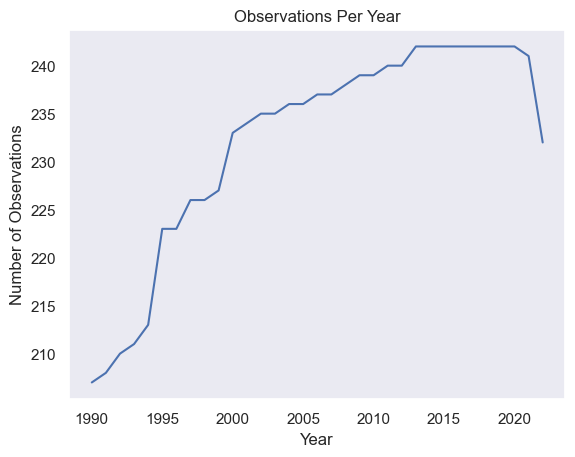

In [67]:
#Look at the number of observations per year. What do you notice?
#Creating series, turning into DataFrame, and renaming columns
observations_per_year = gdp_df.groupby('Year')['Country']\
                           .count()\
                           .to_frame()\
                           .reset_index()\
                           .rename(columns={'Country':'Num_Observations'})

#Plotting line chart
plt.plot(observations_per_year.Year, observations_per_year.Num_Observations)
plt.title('Observations Per Year')
plt.ylabel('Number of Observations')
plt.xlabel('Year')
plt.show()

ANSWER: Then number of observations steadily and dramitically increased from 1990 through 2010 before leveling out.

Question 8

In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

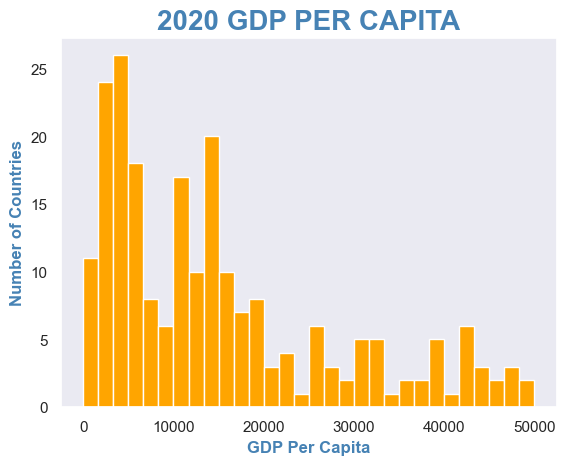

In [68]:
#Create Histogram of GDP per capita for 2020
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
#Drop Year Column
gdp_2020 = gdp_2020.drop(columns='Year')
#Plot histogram
plt.hist(gdp_2020.GDP_Per_Capita,
         color = "orange",
        bins=30,
        range=(0, 50000))
plt.xlabel("GDP Per Capita", color="steelblue", fontweight="bold")
plt.ylabel("Number of Countries", color="steelblue", fontweight="bold")
plt.title("2020 GDP PER CAPITA", fontsize=20, color="steelblue", fontweight="bold")
plt.show()

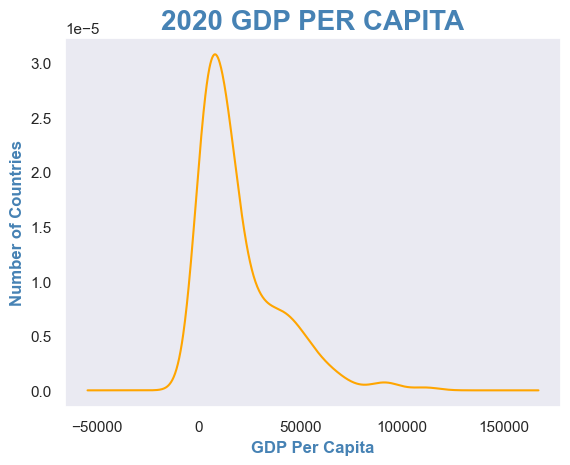

In [69]:
#Create a density plot of GDP Per Capita for 2020
gdp_2020.GDP_Per_Capita.plot.density(color='orange')
plt.xlabel("GDP Per Capita", color="steelblue", fontweight="bold")
plt.ylabel("Number of Countries", color="steelblue", fontweight="bold")
plt.title("2020 GDP PER CAPITA", fontsize=20, color="steelblue", fontweight="bold")
plt.show()

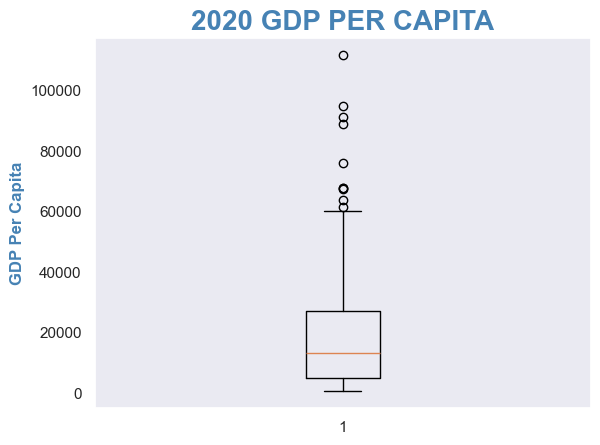

In [70]:
#Create a box plot of GDP Per Capita for 2020
plt.boxplot(gdp_2020.GDP_Per_Capita)
plt.ylabel("GDP Per Capita", color="steelblue", fontweight="bold")
plt.title("2020 GDP PER CAPITA", fontsize=20, color="steelblue", fontweight="bold")
plt.show()

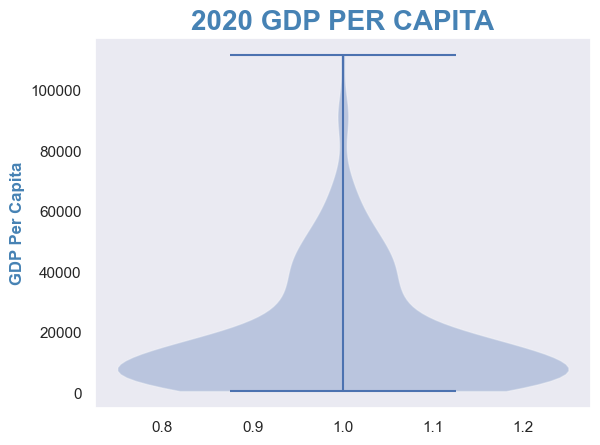

In [71]:
#Create a violin plot of GDP Per Capita for 2020
plt.violinplot(gdp_2020['GDP_Per_Capita'])
plt.ylabel("GDP Per Capita", color="steelblue", fontweight="bold")
plt.title("2020 GDP PER CAPITA", fontsize=20, color="steelblue", fontweight="bold")
plt.show()

Question 9

What was the median GDP per capita value in 2020?

In [72]:
gdp_median_2020 = gdp_2020['GDP_Per_Capita'].median()
gdp_median_2020 = round(gdp_median_2020, 2)
print(gdp_median_2020)

13358.0


ANSWER: The median GDP in 2020 was 13358.0 (rounded to decimals)

Question 10

For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

A boxpl-ot
A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seabo-rn)
A scatter-plot
A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [73]:
#Start by subsetting your data to just 4 years (1990, 2000, 2010, 2020) into a new DataFrame named gdp_decades.
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

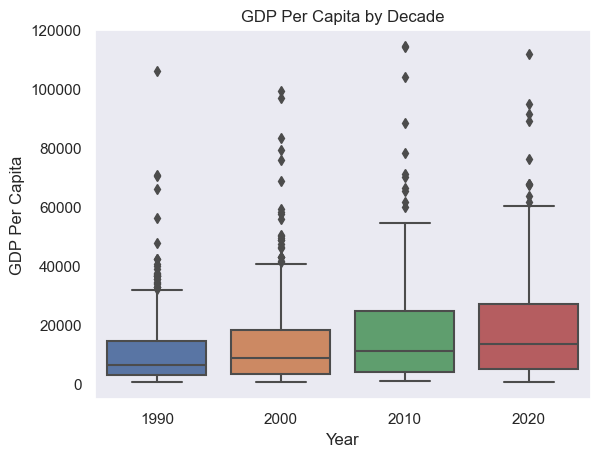

In [74]:
#Boxplot
sns.boxplot(x=gdp_decades['Year'], 
            y=gdp_decades['GDP_Per_Capita'], 
            palette='deep')\
   .set(title='GDP Per Capita by Decade', 
        xlabel='Year', 
        ylabel='GDP Per Capita')
plt.show()

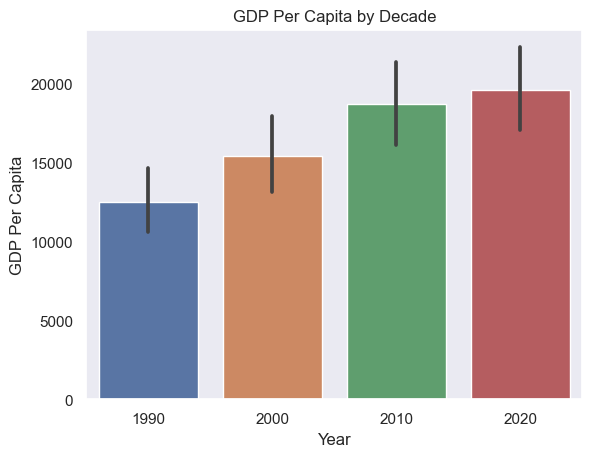

In [75]:
#Barplot
sns.barplot(x=gdp_decades['Year'], 
            y=gdp_decades['GDP_Per_Capita'], 
            palette='deep')\
   .set(title='GDP Per Capita by Decade', 
        xlabel='Year', 
        ylabel='GDP Per Capita')
plt.show()

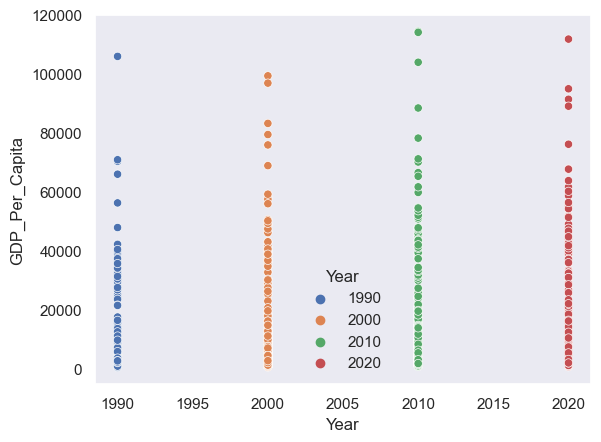

In [76]:
#Scatterplot
sns.scatterplot(data=gdp_decades,
                x="Year",
                y="GDP_Per_Capita",
                hue="Year",
                palette="deep")
plt.show()

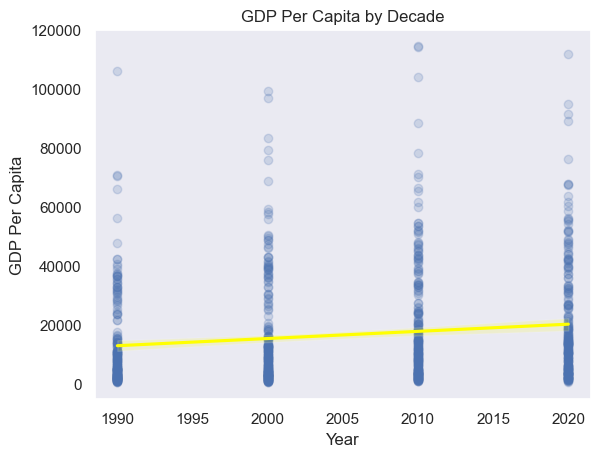

In [77]:
#Scatterplot with trendline
sns.regplot(x=gdp_decades['Year'], 
            y=gdp_decades['GDP_Per_Capita'],
            scatter_kws={"alpha": 0.2}, 
            line_kws={"color": "yellow"})\
    .set(title='GDP Per Capita by Decade', 
        xlabel='Year', 
        ylabel='GDP Per Capita')
plt.show()

ANSWER: The median GDP has slightly increased over time. I don't like the scatter plots with the route I decide to take. I think the scatter plots would maybe have turned out better if I had taken a different approach when setting up the data set.

Question 11

Which country was the first to have a GDP per capita greater than $100,000?

In [78]:
#Subsetting for >100k, sorting by year ascending and viewing the first row
gdp_df[gdp_df['GDP_Per_Capita'] > 100000].sort_values('Year').head(1)

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


ANSWER: United Arab Emirates

Question 12

Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset

In [112]:
#Which country had the highest GDP per capita in 2020?
#Subsetting for 2020, sorting by GDP_Per_Capita descending and viewing the first row
gdp_df[gdp_df['Year'] == 2020].sort_values('GDP_Per_Capita', ascending = False).head(1)
#gdp_df[gdp_df['Year']==2020].nlargest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


ANSWER: Luxembourg

Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset

In [80]:
#Create new df for Luxembourg
gdp_lux = gdp_df[gdp_df['Country'] == 'Luxembourg'].sort_values('Year')
print(gdp_lux)

         Country  Year  GDP_Per_Capita
4178  Luxembourg  1990    70860.819124
4177  Luxembourg  1991    75961.668717
4176  Luxembourg  1992    76323.304753
4175  Luxembourg  1993    78468.921760
4174  Luxembourg  1994    80365.224508
4173  Luxembourg  1995    80379.127629
4172  Luxembourg  1996    80401.032017
4171  Luxembourg  1997    83702.813530
4170  Luxembourg  1998    88185.800110
4169  Luxembourg  1999    94115.384035
4168  Luxembourg  2000    99301.526999
4167  Luxembourg  2001   101143.147977
4166  Luxembourg  2002   103317.331098
4165  Luxembourg  2003   104743.000088
4164  Luxembourg  2004   107634.837198
4163  Luxembourg  2005   108632.360016
4162  Luxembourg  2006   113346.035782
4161  Luxembourg  2007   120647.822959
4160  Luxembourg  2008   118154.667184
4159  Luxembourg  2009   112230.081410
4158  Luxembourg  2010   114343.988089
4157  Luxembourg  2011   112998.390477
4156  Luxembourg  2012   112137.135491
4155  Luxembourg  2013   113050.663254
4154  Luxembourg  2014   

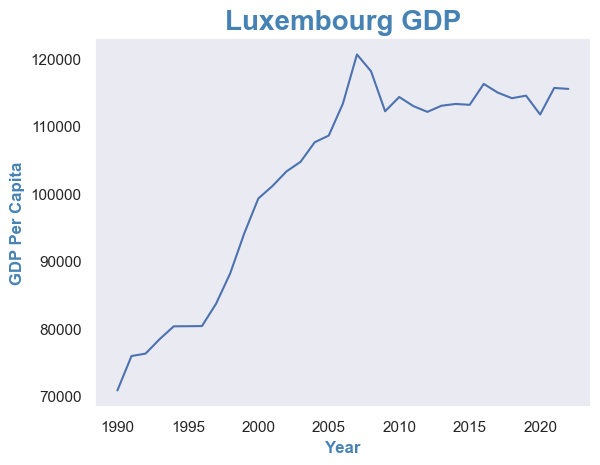

In [81]:
#Plotting line chart
plt.plot(gdp_lux.Year, gdp_lux.GDP_Per_Capita)
plt.title('Luxembourg GDP', fontsize=20, color="steelblue", fontweight="bold")
plt.ylabel('GDP Per Capita', color="steelblue", fontweight="bold")
plt.xlabel('Year', color="steelblue", fontweight="bold")
plt.show()

Question 13

Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [82]:
#Which country had the lowest GDP per capita in 2020?
#Subsetting for 2020, sorting by GDP_Per_Capita ascending and viewing the first row
gdp_df[gdp_df['Year'] == 2020].sort_values('GDP_Per_Capita').head(1)
#.nsmallest

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


ANSWER: Burundi

Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [83]:
#Create new df for Burundi
gdp_bur = gdp_df[gdp_df['Country'] == 'Burundi'].sort_values('Year')
print(gdp_bur)

      Country  Year  GDP_Per_Capita
1003  Burundi  1990     1175.155086
1002  Burundi  1991     1209.388158
1001  Burundi  1992     1190.067435
1000  Burundi  1993     1153.541309
999   Burundi  1994     1103.167298
998   Burundi  1995      956.490976
997   Burundi  1996      880.309412
996   Burundi  1997      867.284265
995   Burundi  1998      891.699844
994   Burundi  1999      862.006680
993   Burundi  2000      837.348411
992   Burundi  2001      833.670879
991   Burundi  2002      846.747295
990   Burundi  2003      810.552335
989   Burundi  2004      818.746063
988   Burundi  2005      796.108713
987   Burundi  2006      809.696011
986   Burundi  2007      807.447481
985   Burundi  2008      812.592170
984   Burundi  2009      801.803427
983   Burundi  2010      804.354941
982   Burundi  2011      807.664958
981   Burundi  2012      814.320771
980   Burundi  2013      824.610523
979   Burundi  2014      831.294839
978   Burundi  2015      781.579287
977   Burundi  2016      764

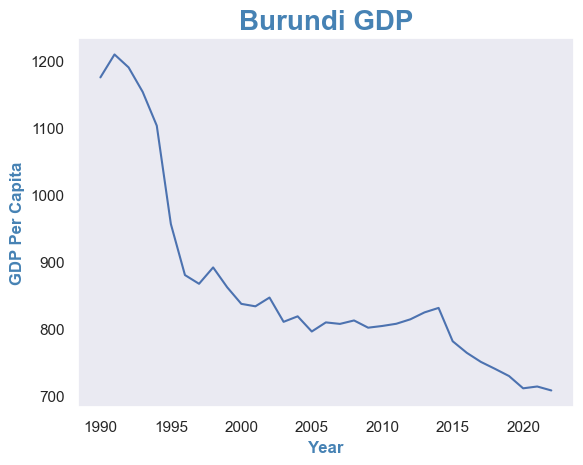

In [84]:
#Plotting line chart
plt.plot(gdp_bur.Year, gdp_bur.GDP_Per_Capita)
plt.title('Burundi GDP', fontsize=20, color="steelblue", fontweight="bold")
plt.ylabel('GDP Per Capita', color="steelblue", fontweight="bold")
plt.xlabel('Year', color="steelblue", fontweight="bold")
plt.show()

Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [85]:
#Filtering to 1990 and 2020, then creating a pivot table to compare years
gdp_comp = gdp_df[gdp_df['Year'].isin([1990, 2020])]\
                                     .pivot(index='Country', 
                                            columns='Year', 
                                            values='GDP_Per_Capita')

In [86]:
#Change Nan to 0
gdp_comp[np.isnan(gdp_comp)] = 0

In [87]:
#Adding a column to identify if a country's GDP increased from 1990 to 2020
gdp_comp['Increase'] = gdp_comp[2020] > gdp_comp[1990]

In [88]:
#Subsetting to see countries that increased, then counting how many
gdp_comp[gdp_comp['Increase'] == True].count()['Increase']

223

In [89]:
#Subsetting to see countries that decreased, then counting how many
gdp_comp[gdp_comp['Increase'] == False].count()['Increase']

19

In [90]:
#Here are the countries that did not increase GDP from 1990 to 2020
gdp_comp[gdp_comp['Increase'] == False]

Year,1990,2020,Increase
Country,,,
Barbados,14097.395550,13805.777541,False
Brunei,70358.724094,61603.550804,False
Burundi,1175.155086,711.355263,False
Central African Republic,1200.613390,847.765012,False
Congo,5007.319245,3384.654335,False
Dem. Rep. Congo,1750.169739,1044.071214,False
Fragile and conflict affected situations,4864.814075,4357.621312,False
Gabon,17559.006114,13903.288955,False
Guinea-Bissau,1998.173206,1803.630591,False


ANSWER: 188 countries increased their GDP from 1990 to 2020 while only 54 decreased, so yes, it true in general that coutries had a higher GDP per capita in 2020 than in 1990. The list of countries that decreased is above.

Question 14

Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [91]:
#Reading in the internet dataset after opening it in Excel and doing an auto-convert to fix Values containing an "E"
internet_df = pd.read_csv('../data/internet_use.csv', 
                          on_bad_lines='skip')

In [92]:
internet_df = internet_df[internet_df['Value'].notna()]

In [93]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [94]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [95]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [96]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

Question 15

Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [97]:
#Removing 'Value Footnotes' column and renaming the the remaining 3 columns
internet_df = internet_df.drop(columns='Value Footnotes')\
               .rename(columns={'Country or Area':'Country', 
                                'Value':'Internet_Users_Pct'})

Question 16

Look at the number of observations in this dataset per year. What do you notice?

In [98]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


In [99]:
#Finding number of countries ("observations") per year, turning into DataFrame, and renaming columns
observations_per_year = internet_df.groupby('Year')['Country']\
                                         .count()\
                                         .to_frame()\
                                         .reset_index()\
                                         .rename(columns={'Country':'Observations'})
print(observations_per_year)

    Year  Observations
0   1960             7
1   1965             7
2   1970             7
3   1975             7
4   1976             7
5   1977             7
6   1978             7
7   1979             7
8   1980             7
9   1981             7
10  1982             7
11  1983             7
12  1984             7
13  1985             7
14  1986             7
15  1987             7
16  1988             7
17  1989             8
18  1990           210
19  1991            39
20  1992            50
21  1993            65
22  1994            91
23  1995           138
24  1996           175
25  1997           184
26  1998           190
27  1999           198
28  2000           199
29  2001           201
30  2002           202
31  2003           196
32  2004           199
33  2005           201
34  2006           200
35  2007           206
36  2008           204
37  2009           203
38  2010           203
39  2011           207
40  2012           203
41  2013           202
42  2014   

ANSWER: The number of observations spiked in 1990 before crashing and climbing back up into the 200's

Question 17

What is the first year to have a non-zero internet users percentage value?

In [100]:
# Finding users > 0 and finding the minimum year
internet_df[internet_df['Internet_Users_Pct'] > 0].min()['Year']

1990

ANSWER: 1990

Question 18

How does the distribution of internet users percent differ for 2000 and 2014?

In [101]:
internet_00_14 = internet_df[(internet_df["Year"] == 2000) | (internet_df["Year"] == 2014)]
internet_00_14.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
15,Albania,2014,60.100000
29,Albania,2000,0.114097
36,Algeria,2014,18.090000
50,Algeria,2000,0.491706


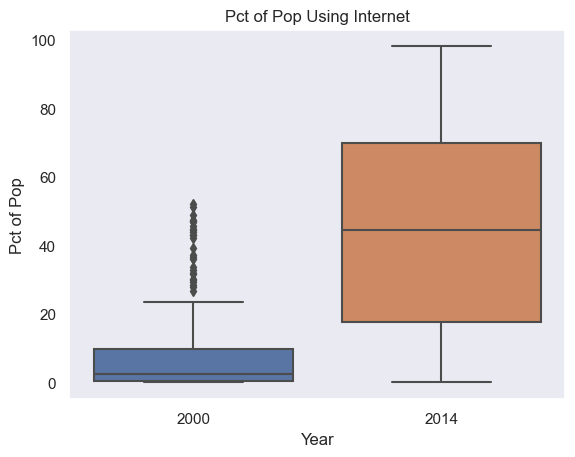

In [102]:
#Boxplot to show comparison in distribuion
sns.boxplot(x=internet_00_14['Year'], 
            y=internet_00_14['Internet_Users_Pct'], 
            palette='deep')\
   .set(title='Pct of Pop Using Internet', 
        xlabel='Year', 
        ylabel='Pct of Pop')
plt.show()

ANSWER: The distribution of the percentage of populations using the internet grew both in the distance between the min percentage
and the max percentage, as well as the overall percentages of populations using the internet.

Question 19

For how many countries was the percentage of internet users below 5% in 2014?

In [103]:
#Querying for year and internet %, then counting how many countries
internet_df.query('Year == 2014 and Internet_Users_Pct < 5').count()['Country']

16

ANSWER: 16

Question 20

Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [104]:
#Merging the two dataframes
gdp_and_internet_use = gdp_df.merge(internet_df, on=['Country', 'Year'], how='outer')
print(gdp_and_internet_use)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
0     Afghanistan  2021     1517.016266                 NaN
1     Afghanistan  2020     1968.341002                 NaN
2     Afghanistan  2019     2079.921861                 NaN
3     Afghanistan  2018     2060.698973                 NaN
4     Afghanistan  2017     2096.093111                 NaN
...           ...   ...             ...                 ...
8731        Yemen  1999             NaN            0.056629
8732        Yemen  1998             NaN            0.023323
8733        Yemen  1997             NaN            0.015025
8734        Yemen  1996             NaN            0.000621
8735        Yemen  1990             NaN            0.000000

[8736 rows x 4 columns]


Question 21

Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [105]:
#Subsetting for 2014 then sorting by internet % desc to see top 3
top_3_internet_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]\
                    .sort_values('Internet_Users_Pct', ascending=False)\
                    .head(3)
print(top_3_internet_2014)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2993  Iceland  2014    50450.741612               98.16
687   Bermuda  2014    77361.104881               96.80
5212   Norway  2014    62838.515727               96.30


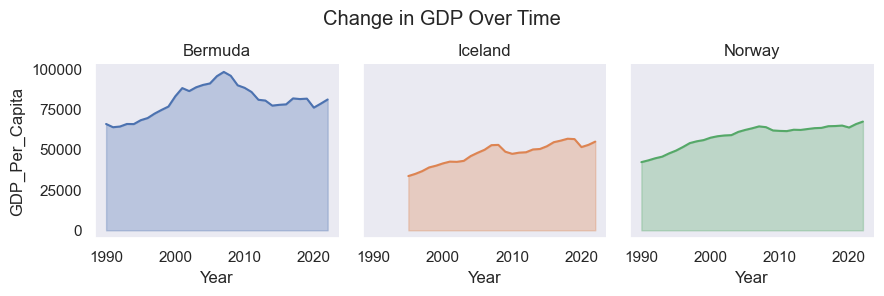

In [106]:
#Creating the table by subestting to the top 3 countries above
top_internet_all_years = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland', 'Bermuda', 'Norway'])]
#Creating the facet grid
grid = sns.FacetGrid(top_internet_all_years, 
                     col='Country', 
                     hue='Country', 
                     palette='deep')
#Adding the data
grid = grid.map(plt.plot, 'Year', 'GDP_Per_Capita')
#Filling in the lines
grid = grid.map(plt.fill_between, 'Year', 'GDP_Per_Capita', alpha=0.3)
#Titling the indivitual plots
grid = grid.set_titles("{col_name}")
#Titling the entire grid
plt.subplots_adjust(top=.8)
grid = grid.fig.suptitle('Change in GDP Over Time')

ANSWER: All 3 have slowly increased over time.

Question 22

Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014

In [107]:
gdp_and_internet_use_2014 =  gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].copy()
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7,Afghanistan,2014,2144.449634,6.39
28,Africa Eastern and Southern,2014,3642.875373,NaN
61,Africa Western and Central,2014,4146.994622,NaN
94,Albania,2014,11586.817446,60.10
127,Algeria,2014,11561.259795,18.09


Question 23

Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

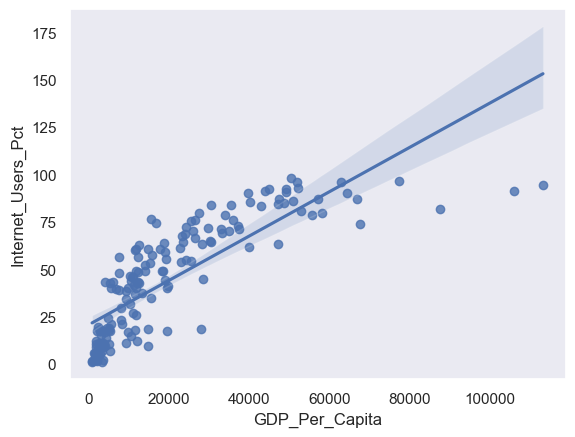

In [108]:
sns.regplot(x=gdp_and_internet_use_2014["GDP_Per_Capita"], y=gdp_and_internet_use_2014["Internet_Users_Pct"])
plt.show()

ANSWER: As the percentage of th population utilizing the internet increased, so did the GDP Per Capita.

Question 24

Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [109]:
#Creating GDP Categories and adding to the DataFrame
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 
                                               3, 
                                               labels=['Low', 'Medium', 'High'])

Question 25

Stretch Question: How does the median internet users percentage compare for the three gdp groups?

In [110]:
#Grouping by GDP Category, then finding the median internet %
grouped_gdp_internet_2014 = gdp_and_internet_use_2014.groupby('GDP_group')\
                                                     .median('Internet_Users_Pct')\
                                                     .reset_index()\
                                                     .drop(columns='Year')\
                                                     .rename(columns={'Internet_Users_Pct':'Median_Internet_Users_Perc', 
                                                                      'GDP_Per_Capita':'Median_GDP_Per_Capita'})
print(grouped_gdp_internet_2014)

  GDP_group  Median_GDP_Per_Capita  Median_Internet_Users_Perc
0       Low            3378.364591                        10.6
1    Medium           12164.228037                        43.4
2      High           37454.808489                        78.7


C:\Users\joshh\AppData\Local\Temp\ipykernel_10028\4202511951.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_gdp_internet_2014 = gdp_and_internet_use_2014.groupby('GDP_group')\


BONUS

Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore

In [111]:
#Reading in the education dataset after opening it in Excel and doing an auto-convert to fix Values containing an "E"
internet_df = pd.read_csv('../data/internet_use.csv', 
                          on_bad_lines='skip')